In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import string

from pandas import Series
from pandas import DataFrame
from typing import List,Tuple

from pandas import Categorical
from pandas.api.types import CategoricalDtype

from tqdm import tnrange#, tqdm_notebook
from sklearn.linear_model import LogisticRegression
from plotnine import *

# Local imports
from common import *
from convenience import *

from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import multivariate_normal


## I. White Gaussian noise


Multivariate normal distribution can be also defined in terms of basic source distribution - standard normal random vector. We will sketch some  

In [6]:
white_gaussian_2d = multivariate_normal(mean = [0,0], cov = [[1, 0], [0,1]])

In [104]:
pdf = (DataFrame(np.mgrid[-4:4:0.1, -4:4:0.1].reshape(2,-1).T, columns = ['x', 'y'])
       .assign(density = lambda df: white_gaussian_2d.pdf(df[['x', 'y']])))
head(pdf)

,x,y,density
0,-4.0,-4.0,1.791053e-08
1,-4.0,-3.9,2.658611e-08
2,-4.0,-3.8,3.907132e-08
3,-4.0,-3.7,5.684844e-08
4,-4.0,-3.6,8.189097e-08


In [126]:
df = (pdf
      .assign(x1 = lambda df: df['x'])
      .assign(x2 = lambda df: df['y'])
      .set_index(['x1', 'x2'])
      .unstack('x1'))

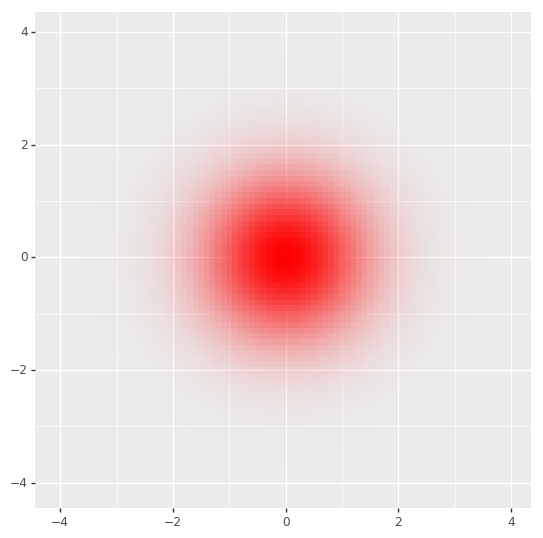

<ggplot: (-9223372029296733415)>

In [147]:
p = ggplot(pdf)
p = p + geom_tile(aes(x = 'x', y ='y', alpha = 'density'), fill = 'red') 
p = p + scale_alpha_continuous(range = (0,1), guide=False)
p = p + coord_fixed() 
p = p + scale_x_continuous(name='') +  scale_y_continuous(name='')
p

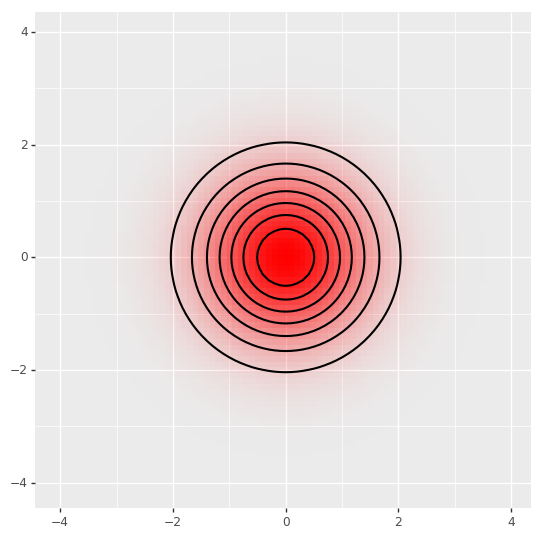

In [150]:
fig = p.draw()
axes = fig.get_axes()
for ax in axes:
    ax.contour(df['x'] , df['y'], df['density'], colors = 'black')# cmap=plt.get_cmap('Greys'))
fig.savefig("results/white_gaussian_noise.pdf", figsize=(6, 6))#, bbox_inches='tight')

## II. Colored noise

In [3]:
%config IPCompleter.greedy=True